In [34]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data=pd.merge(clinical_trial_data_df, mouse_drug_data_df, on='Mouse ID', how='left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [35]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupeddf=combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']



In [36]:
# Convert to DataFrame

# Preview DataFrame

mean_tumor_volume=groupeddf.mean()

mean_tumor_volume_df=mean_tumor_volume.reset_index()

mean_tumor_volume_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [37]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

stderr_tumor_volume=groupeddf.sem()

stderr_tumor_volume_df=stderr_tumor_volume.reset_index()

stderr_tumor_volume_df.head()
    


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [38]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
rearranged_df=mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')
rearranged_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


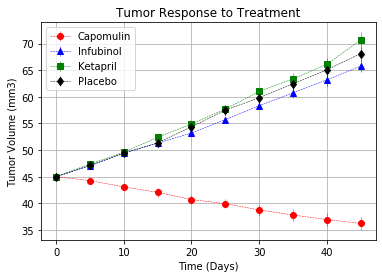

In [39]:
# Generate the Plot (with Error Bars)

stderrorCapomulin=stderr_tumor_volume_df.loc[stderr_tumor_volume_df['Drug']=='Capomulin']['Tumor Volume (mm3)']
capomulin=plt.errorbar(rearranged_df.index, rearranged_df['Capomulin'],stderrorCapomulin, fmt='o',label='Capomulin', color='red', ls='--',linewidth=0.5)

stderrorInfubinol=stderr_tumor_volume_df.loc[stderr_tumor_volume_df['Drug']=='Infubinol']['Tumor Volume (mm3)']
infubinol=plt.errorbar(rearranged_df.index, rearranged_df['Infubinol'],stderrorInfubinol, fmt='^', label='Infubinol', color='blue', ls='--',linewidth=0.5)

stderrorKetapril=stderr_tumor_volume_df.loc[stderr_tumor_volume_df['Drug']=='Ketapril']['Tumor Volume (mm3)']
ketapril=plt.errorbar(rearranged_df.index, rearranged_df['Ketapril'],stderrorKetapril, fmt='s', label='Ketapril',color='green', ls='--',linewidth=0.5)


stderrorPlacebo=stderr_tumor_volume_df.loc[stderr_tumor_volume_df['Drug']=='Placebo']['Tumor Volume (mm3)']
placebo=plt.errorbar(rearranged_df.index, rearranged_df['Placebo'],stderrorPlacebo, fmt='d',label='Placebo', color='black', ls='--',linewidth=0.5)


plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.savefig(os.path.join('data','tumor_response_to_treatment.png'))




In [40]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

groupeddf2=combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
mean_met_site=groupeddf2.mean()
mean_met_site_df=mean_met_site.reset_index()

mean_met_site_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [41]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
stderr_met_site=groupeddf2.sem()

stderr_met_site_df=stderr_met_site.reset_index()

stderr_met_site_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [42]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked


rearranged_df2=mean_met_site_df.pivot(index='Timepoint', columns='Drug',values='Metastatic Sites')
rearranged_df2.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


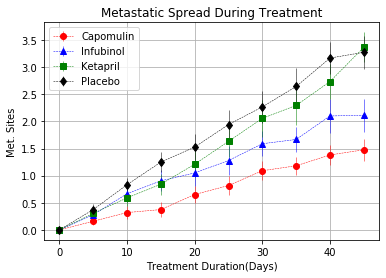

In [43]:
# Generate the Plot (with Error Bars)
stderrorCapomulin2=stderr_met_site_df.loc[stderr_met_site_df['Drug']=='Capomulin']['Metastatic Sites']
capomulin=plt.errorbar(rearranged_df2.index, rearranged_df2['Capomulin'],stderrorCapomulin2, fmt='o',label='Capomulin', color='red', ls='--',linewidth=0.5)

stderrorInfubinol2=stderr_met_site_df.loc[stderr_met_site_df['Drug']=='Infubinol']['Metastatic Sites']
infubinol=plt.errorbar(rearranged_df2.index, rearranged_df2['Infubinol'],stderrorInfubinol2, fmt='^', label='Infubinol', color='blue', ls='--',linewidth=0.5)

stderrorKetapril2=stderr_met_site_df.loc[stderr_met_site_df['Drug']=='Ketapril']['Metastatic Sites']
ketapril=plt.errorbar(rearranged_df2.index, rearranged_df2['Ketapril'],stderrorKetapril2, fmt='s', label='Ketapril',color='green', ls='--',linewidth=0.5)


stderrorPlacebo2=stderr_met_site_df.loc[stderr_met_site_df['Drug']=='Placebo']['Metastatic Sites']
placebo=plt.errorbar(rearranged_df2.index, rearranged_df2['Placebo'],stderrorPlacebo2, fmt='d',label='Placebo', color='black', ls='--',linewidth=0.5)


plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Met. Sites')
plt.grid()
plt.savefig(os.path.join('data','metastatic_spread_during_treatment.png'))



In [44]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
groupeddf3=combined_data.groupby(['Drug', 'Timepoint'])['Mouse ID']
mice_count=groupeddf3.nunique()
mice_count_df=pd.DataFrame(mice_count)


mice_count_df.reset_index(inplace=True)
mice_count_df=mice_count_df.rename(columns={'Mouse ID':'Mouse Count'})
# Convert to DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [45]:
# Minor Data Munging to Re-Format the Data Frames
rearranged_df3=mice_count_df.pivot(index='Timepoint', columns='Drug',values='Mouse Count')
rearranged_df3.head()


# Preview the Data Frame



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


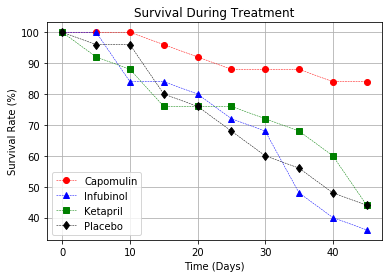

In [46]:
# Generate the Plot (Accounting for percentages)
timepoint_0=mice_count_df.loc[mice_count_df['Timepoint']==0]


initialMouseCount_Capomulin = timepoint_0.loc[timepoint_0['Drug']=='Capomulin']['Mouse Count'].to_numpy()[0]
mice_countCapomulin=mice_count_df.loc[mice_count_df['Drug']=='Capomulin']['Mouse Count']
mice_countCapomulinPercent=mice_countCapomulin.divide(float(initialMouseCount_Capomulin))*100
survival_rate_capomulin=plt.plot(rearranged_df3.index,mice_countCapomulinPercent,marker='o', color='red', label='Capomulin', ls='--',linewidth=0.5)


initialMouseCount_Infubinol = timepoint_0.loc[timepoint_0['Drug']=='Infubinol']['Mouse Count'].to_numpy()[0]
mice_countInfubinol=mice_count_df.loc[mice_count_df['Drug']=='Infubinol']['Mouse Count']
mice_countInfubinolPercent=mice_countInfubinol.divide(float(initialMouseCount_Infubinol))*100
survival_rate_Infubinol=plt.plot(rearranged_df3.index,mice_countInfubinolPercent,marker='^', color='blue', label='Infubinol', ls='--',linewidth=0.5)

initialMouseCount_Ketapril = timepoint_0.loc[timepoint_0['Drug']=='Ketapril']['Mouse Count'].to_numpy()[0]
mice_countKetapril=mice_count_df.loc[mice_count_df['Drug']=='Ketapril']['Mouse Count']
mice_countKetaprilPercent=mice_countKetapril.divide(float(initialMouseCount_Ketapril))*100
survival_rate_Ketapril=plt.plot(rearranged_df3.index,mice_countKetaprilPercent,marker='s', color='green', label='Ketapril', ls='--',linewidth=0.5)

initialMouseCount_Placebo = timepoint_0.loc[timepoint_0['Drug']=='Placebo']['Mouse Count'].to_numpy()[0]
mice_countPlacebo=mice_count_df.loc[mice_count_df['Drug']=='Placebo']['Mouse Count']
mice_countPlaceboPercent=mice_countPlacebo.divide(float(initialMouseCount_Placebo))*100
survival_rate_Placebo=plt.plot(rearranged_df3.index,mice_countPlaceboPercent,marker='d', color='black', label='Placebo', ls='--',linewidth=0.5)


plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.savefig(os.path.join('data','survival_druing_treatment.png'))



In [47]:
# Calculate the percent changes for each drug
percent_change=(rearranged_df.iloc[-1]/(rearranged_df.iloc[0])-1)*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [48]:
# Store all Relevant Percent Changes into a Tuple
tumor_percent_change = tuple(percent_change.values)
tumor_percent_change

(-19.47530266789417,
 42.51649185589741,
 46.12347172785185,
 57.02879468660606,
 53.92334713476923,
 51.29796048315151,
 47.24117486320634,
 -22.32090046276667,
 52.08513428789896,
 46.57975086509525)

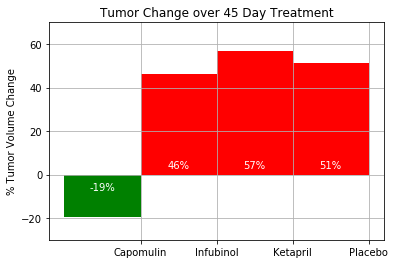

In [49]:
# Splice the data between passing and failing drugs
passing_drug=percent_change<0


# Orient widths. Add labels, tick marks, etc. 



drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percent_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing_drug.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')




# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig(os.path.join('data','tumor_change_over_45day_treatment.png'))


